In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

PMF (Probability Mass Function- Olasılık Kütle Fonksiyonu) for discrete [nokta olasılığın bulunmasında kullanılıyor]

PDF (Probability density  function at x) for continuous

CDF (Cumulative distribution fuction) [ İnterval'ın olasılığı bulunmasının istendiğinde kullanılır. ]

PPF (Percent point function (inverse of "cdf")) [CDF'in tersi olarak olasılığı verilen item'ın değeri bulunur]



Ex1: The probability that a patient recovers from a stomach disease is 0.8.

Suppose 20 people are known to have contracted this disease.

What is the probability that

a. exactly 14 recover


In [4]:
p=0.8
n=20
x=14

Hastaların yüzde 80'i iyileşiyor. yani hastalığı atlatma olasılığı 0.8. Elimizde 20 tane hasta var. tam olarak 14 kişinin iyileşme olasılığı.
Önünüze böyle bir soru geldiğinde; olasılık var (p), 20 insan var (n, trial). bu durumda nasıl bir olasılıktan bahsederiz. Binomial.

Binomial dediğimiz zaman n (trial sayısı) ve p (başarı-succsess olasılığı) aklımıza gelmeli! 
( burada success'imiz hastalıktan iyileşme)

Böyle bir deneyin expected value (beklenen deeğer) kaçtır? 
16 kişinin iyileşmesini bekleriz. (bir kişinin iyileşme olasılığı 0.8 ise 20 kişiden kaçı iyileşir?) 20 * 0.8 = 16

bize tam olarak 14 kişinin iyileşme ihtimalini soruyor
 
 Soruda binomial bahsedildiğini anladık peki hangi metodu kullanmalıyız?
--> PMF!!

Discrete distributionlarda PMF (Probability Mass Function-Olasılık Kütle Fonksiyonu) kullanıyoruz.

"exactly" kelimesi bana pmf kullanacağımı söylüyor. 

çünkü discrete distribution larda tam olarak belirli X değerlerinden bahsedebiliriz. continuous olduğunda aralıklarda işlem yapıyoruz! Burada ben tam olarak 14'ün karşılığını arıyorum.

In [9]:
stats.binom.pmf(14, 20, 0.8)

0.10909970097305016

In [ ]:
b. at least  10 recover? 

In [12]:
1-stats.binom.cdf(9, 20, 0.8) #10 dahil, 10'dan 20'e arıyorum

0.9994365863023398

 c) at least 14 but not more 18 recover 14------18

In [17]:
stats.binom.cdf(18, 20, 0.8)-stats.binom.cdf(13, 20, 0.8) #13 çıkarılark 14 dahildir.

0.844132196156189

In [18]:
#second way
stats.binom.pmf(14, 20 ,0.8) + stats.binom.pmf(15, 20 ,0.8) + stats.binom.pmf(16, 20 ,0.8) +stats.binom.pmf(17, 20 ,0.8) + stats.binom.pmf(18, 20 ,0.8) 

0.8441321961561888

d. at most 16 recover? 

In [19]:
stats.binom.cdf(16, 20, 0.8) # 16 dahil 1-----16

0.5885511380434314

e. Construct discrete probability distribution table and draw a grap

In [21]:
dist=[]
for i in range(n+1):
    dist.append(stats.binom.pmf(i, n, p))
    print( str(i) +"\t" + str(stats.binom.pmf(i, n, p)))

0	1.0485759999999954e-14
1	8.388607999999964e-13
2	3.187671039999986e-11
3	7.650410495999971e-10
4	1.3005697843199968e-08
5	1.664729323929596e-07
6	1.664729323929598e-06
7	1.3317834591436782e-05
8	8.656592484433914e-05
9	0.0004616849325031411
10	0.0020314137030138213
11	0.007386958920050267
12	0.02216087676015084
13	0.05454985048652511
14	0.10909970097305016
15	0.17455952155688043
16	0.2181994019461004
17	0.20536414300809458
18	0.13690942867206324
19	0.05764607523034235
20	0.011529215046068483


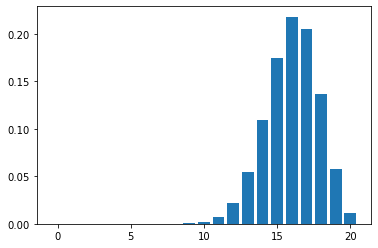

In [25]:

plt.bar(list(range(n+1)), dist )
plt.show()

Scores on an examination are assumed to be normally distributed with mean 78 and variance 36.
 What is the probability that a person taking the examination scores higher than 72?¶

In [28]:
mu=78
sigma= 36
x=72

In [30]:
1-stats.norm.cdf(x, mu, 6)

0.8413447460685429

b. Suppose that students scoring in the top 10% of this distribution are to receive an A grade.
What is the minimum score a student must achieve to earn an A grade?

10% lik kesime girenler A alıyorsa bu bir olasılıktır. olasılıktan yola çıkarak X değerini arıyorum.

Bu soruda öyle bir X değerini arıyorum ki, o değerden sonraki alan dağılım grafiğinin %10'una eşit.  

bunun için ppf kullanacağım
ppf'in cdf'in tersidir.

yani ppf() fonksiyounun içine cdf(X)'i (X'e kadar olan kümülatif toplam p'yi) koyarsan X değerine ulaşırsın.

!!! cdf:  x değerini içine alır, ona kadar olan toplam p'yi verir
!!! ppf:  x değerine kadar olan toplam p'yi içine alır, x değerini verir.

p --> % olasılık

In [32]:
stats.norm.ppf(0.9, mu, 6) # %10 girmek için en kaç alınmalı

85.6893093932676

In [33]:
stats.norm.cdf(90, mu, 6) #90'a kadar alınma olasılığı

0.9772498680518208

In [35]:
stats.norm.pdf(90, mu, 6) #90 alma olsılığı

0.008998494418864677

c. What must be the cutoff point for passing the examination if the examiner wants only the top 28.1% of all scores to be passing?

In [39]:
q=1-0.281

In [41]:
stats.norm.ppf(q, mu, 6)

81.47924035456623

d. Approximately what proportion of students have scores 5 or more points above the score that cuts off the lowest 25%?

In [43]:
a=stats.norm.ppf(0.25, mu, 6)
a

73.95306149882352

In [45]:
x=a+5
x

78.95306149882352

In [47]:
stats.norm.cdf(x, mu, 6) #78.95 e kadar alanların yüzdesi

0.5631039448377338

In [48]:
1-stats.norm.cdf(x, mu, 6) #78.95'ten fazla puan alanların yüzdeis

0.43689605516226615

OPTIONAL

f. If it is known that a student’s score exceeds 72, what is the probability that his or her score exceeds 84?
Eğer bir öğrencinin notu 72'yi aşıyorsa. bunun notunun 84'ü aşma olasılığı nedir? 

In [52]:
x1=stats.norm.cdf(72, mu, 6)
x1

0.15865525393145707

In [53]:
x2=stats.norm.cdf(84, mu, 6)
x2

0.8413447460685429

In [55]:
(x2-x1)/x2

0.8114265826549397

For a t distribution with 15 degrees of freedom, 90% of the distribution is within how many standard deviations of the mean?

15 serbestlik derecesi ile Ortalamadan sağa ve sola kaç standart sapma uzaklaşmam lazım ki ortada kalan alan datanın 90%'ını oluştursun? (veriler bu limitler arasında kalsın)

In [56]:
dof=15
q=0.95

In [57]:
stats.t.ppf(0.95, 15)

1.7530503556925547

In [59]:
xs= np.linspace(-5,5,1000)
xs

array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
       -4.94994995, -4.93993994, -4.92992993, -4.91991992, -4.90990991,
       -4.8998999 , -4.88988989, -4.87987988, -4.86986987, -4.85985986,
       -4.84984985, -4.83983984, -4.82982983, -4.81981982, -4.80980981,
       -4.7997998 , -4.78978979, -4.77977978, -4.76976977, -4.75975976,
       -4.74974975, -4.73973974, -4.72972973, -4.71971972, -4.70970971,
       -4.6996997 , -4.68968969, -4.67967968, -4.66966967, -4.65965966,
       -4.64964965, -4.63963964, -4.62962963, -4.61961962, -4.60960961,
       -4.5995996 , -4.58958959, -4.57957958, -4.56956957, -4.55955956,
       -4.54954955, -4.53953954, -4.52952953, -4.51951952, -4.50950951,
       -4.4994995 , -4.48948949, -4.47947948, -4.46946947, -4.45945946,
       -4.44944945, -4.43943944, -4.42942943, -4.41941942, -4.40940941,
       -4.3993994 , -4.38938939, -4.37937938, -4.36936937, -4.35935936,
       -4.34934935, -4.33933934, -4.32932933, -4.31931932, -4.30

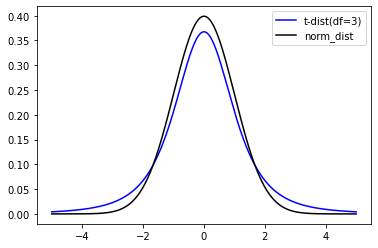

In [63]:
plt.plot(xs, stats.t.pdf(xs,3), "b", label="t-dist(df=3)")
plt.plot(xs, stats.norm.pdf(xs), "k", label="norm_dist")
plt.legend();

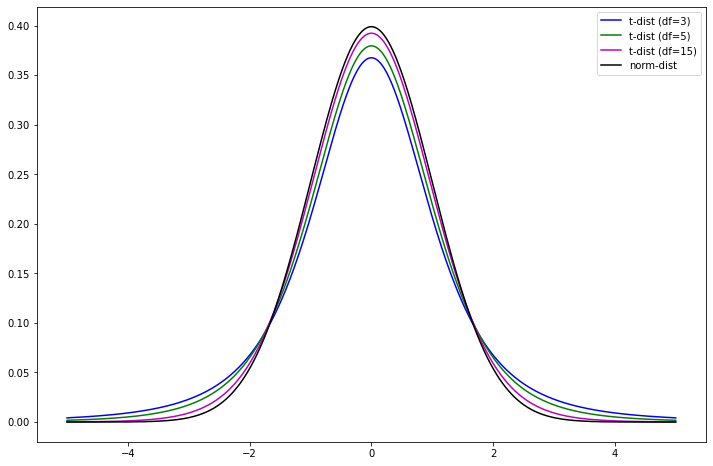

In [65]:
plt.figure(figsize=(12,8))
xs = np.linspace(-5,5,1000)
plt.plot(xs, stats.t.pdf(xs,3), "b", label = "t-dist (df=3)")
plt.plot(xs, stats.t.pdf(xs,5), "g", label = "t-dist (df=5)")
plt.plot(xs, stats.t.pdf(xs,15), "m", label = "t-dist (df=15)")
plt.plot(xs, stats.norm.pdf(xs), "k", label = "norm-dist")
plt.legend();

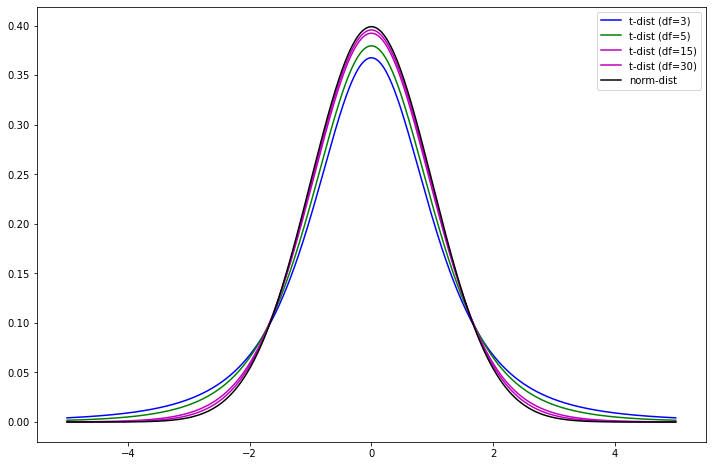

In [67]:

plt.figure(figsize=(12,8))
xs = np.linspace(-5,5,1000)
plt.plot(xs, stats.t.pdf(xs,3), "b", label = "t-dist (df=3)")
plt.plot(xs, stats.t.pdf(xs,5), "g", label = "t-dist (df=5)")
plt.plot(xs, stats.t.pdf(xs,15), "m", label = "t-dist (df=15)")
plt.plot(xs, stats.t.pdf(xs,30), "m", label = "t-dist (df=30)")
plt.plot(xs, stats.norm.pdf(xs), "k", label = "norm-dist")
plt.legend();

Confidence Intervals Using the Normal Distribution

In [70]:
import seaborn as sns
tips=sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


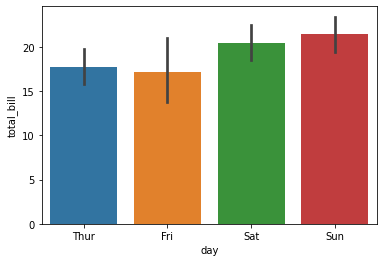

In [72]:
sns.barplot(data=tips, x="day", y="total_bill");

Güven aralığını Ci büyütürsem çubukların boyları uzayacaktır. 
Daha yüksek bir güvenilirlik demek daha büyük bir aralık demek, daha büyük bir aralığı kabul etmek durumundayım. (mean, 95 % olasılıkla 100-150 aralığında ise, tabi ki bunun 90-180 aralığında olma ihtimali daha yüksek olur.)  

In [73]:
tipsSun = tips[tips['day'] == 'Sun']
tipsSun

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [74]:
tipsSun["total_bill"].mean()

21.410000000000004

In [75]:
tipsSun["total_bill"].std()

8.832121828869889

In [76]:
sigma=tipsSun["total_bill"].std()
sigma

8.832121828869889

5. Calculate standart error of the mean (sem)

Bulduğum ortalamanın (21.41) bir güven aralığı var. Zaten biz bunu barplotta da gördüm. Güven aralığını 95% olarak inşa ettim.

Bu ortalama istatistiğinin bir standart hatası var. O neydi?  
Sigma / kök(n) ( σ / √n ) 


In [79]:
n=len(tipsSun)
n

76

In [81]:
sem= sigma/np.sqrt(n)
sem

1.0131138555021968

6. Calculate the margin of error (95%)

In [84]:
z=stats.norm.ppf(0.975) # z 
z

1.959963984540054

sem*z-m +sem*z

In [87]:
upper= tipsSun["total_bill"].mean() + sem*z
upper

23.395666669022827

In [89]:
lower=tipsSun["total_bill"].mean() - sem*z
lower

19.42433333097718

scipy.stats kullanarak ortalama etrafında %95 Güven Aralığını hesaplayın¶

In [90]:
stats.norm.interval(alpha=0.95, loc=tipsSun["total_bill"].mean(), scale=sem)

(19.42433333097718, 23.395666669022827)

In [91]:
stats.norm.interval(alpha=0.85, loc=tipsSun["total_bill"].mean(), scale=sem)

(19.951590721360795, 22.868409278639213)